In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Common parameters 

In [7]:
# Random Generator instance
rng = np.random.default_rng()

grid_points = 100
paths = 1000

r = 0.01
vol = 0.2
T = 1
S = 100
dt = T / grid_points

### 1. Geometric Brownian Motion

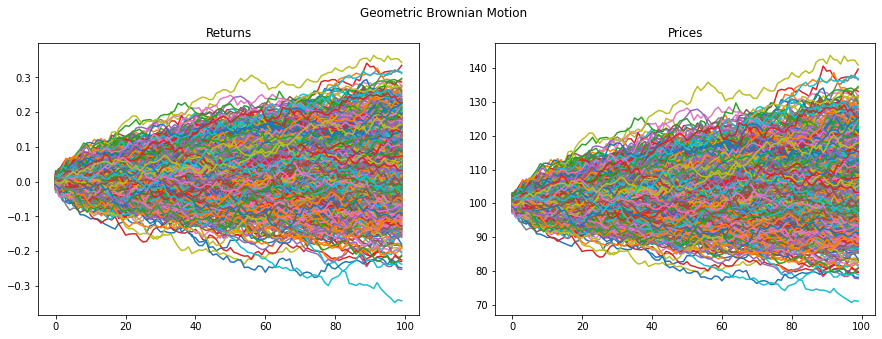

In [15]:
wiener_process = rng.standard_normal([paths, grid_points]) * np.sqrt(dt)

drift_component = (r - 0.5 * vol**2) * dt
diffusive_component = vol * wiener_process

returns = np.cumsum(drift_component + diffusive_component, axis=1)
prices = S * np.exp(returns) 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.patch.set_facecolor('white')
fig.suptitle("Geometric Brownian Motion")
ax1.set_title("Returns")
ax1.plot(returns.T)
ax2.set_title("Prices")
ax2.plot(prices.T)
plt.show()

### 2. Variance-Gamma Process | Euler-Maruyama: dx = \mu * dG + \sigma * dW(dG)

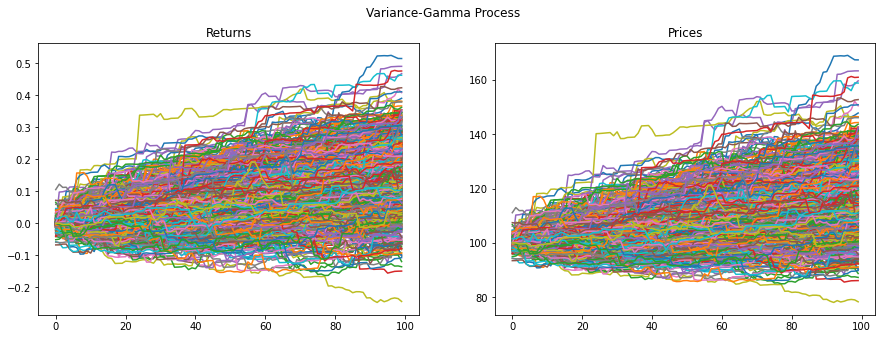

In [17]:
# Drift
mu = 0.1

# Scale parameter for Gamma distribution
nu = 0.05

gamma_process = rng.gamma(dt / nu, nu, size=(paths, grid_points))

drift_component = mu * gamma_process
jump_component = vol * np.sqrt(gamma_process) * rng.standard_normal([paths, grid_points])

returns = np.cumsum(r*dt + drift_component + jump_component, axis=1)
prices = S * np.exp(returns)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.patch.set_facecolor('white')
fig.suptitle("Variance-Gamma Process")
ax1.set_title("Returns")
ax1.plot(returns.T)
ax2.set_title("Prices")
ax2.plot(prices.T)
plt.show()

### 3. Merton Jump process | Euler-Maruyama: dx = \mu * dt + \sigma * dW + dJ

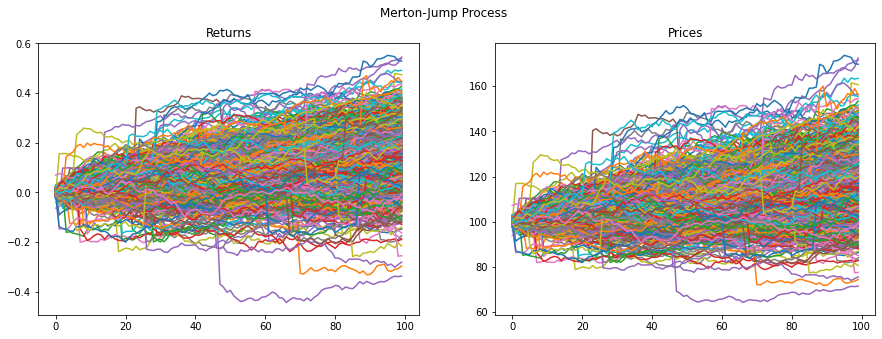

In [20]:
# Drift
mu = 0.1

# Jump parameters
lam = 0.5
mu_j = 0
sigma_j = 0.1

wiener_process = rng.standard_normal([paths, grid_points]) * np.sqrt(dt)

drift_component = mu * dt
diffusive_component = vol * wiener_process
jump_component = np.multiply(
        rng.poisson(lam * dt, size=(paths, grid_points)),
        rng.normal(mu_j, sigma_j, size=(paths, grid_points)),
)

returns = np.cumsum(r*dt + drift_component + diffusive_component + jump_component, axis=1)
prices = S * np.exp(returns)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.patch.set_facecolor('white')
fig.suptitle("Merton-Jump Process")
ax1.set_title("Returns")
ax1.plot(returns.T)
ax2.set_title("Prices")
ax2.plot(prices.T)
plt.show()

# Interest Rates

## Common parameters

In [21]:
# General parameters
r = 0.05
 
theta = 1.5
mu = 0.05
vol = 0.1

### 1. Ornstein-Uhlenbeck | Euler-Maruyama: dx = \theta (\mu - x) * dt + \sigma * dW

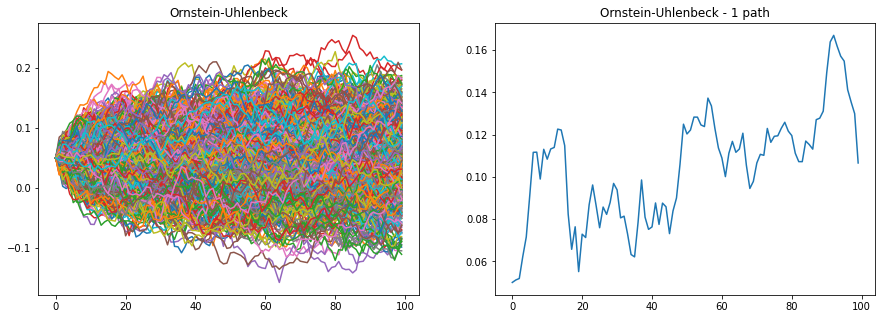

In [23]:
rates = np.empty([paths, grid_points])
rates.T[0] = r

for path_idx in range(paths):
    for idx in range(grid_points - 1):
        rates[path_idx, idx + 1] = (
            rates[path_idx, idx] + theta * (mu - rates[path_idx, idx]) * dt + vol * rng.standard_normal() * np.sqrt(dt)
        )
 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.patch.set_facecolor('white')
ax1.plot(rates.T)
ax1.set_title("Ornstein-Uhlenbeck")
ax2.plot(rates[1])
ax2.set_title("Ornstein-Uhlenbeck - 1 path")
plt.show()

### 2. Cox-Ingersoll-Ross | Euler-Maruyama: dx = \theta (\mu - x) * dt + \sigma * sqrt(x) * dW

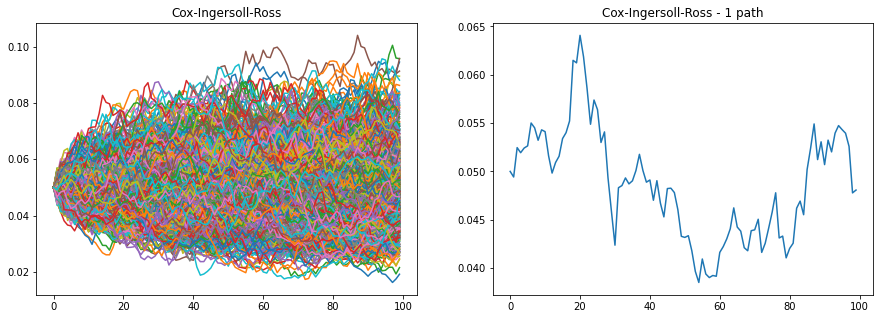

In [13]:
rates = np.empty([paths, grid_points])
rates.T[0] = r

for path_idx in range(paths):
    for idx in range(grid_points - 1):
        rates[path_idx, idx + 1] = (
            rates[path_idx, idx] + theta * (mu - rates[path_idx, idx]) * dt
            + vol * rng.standard_normal() * np.sqrt(dt) * np.sqrt(rates[path_idx, idx]))
   
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.patch.set_facecolor('white')
ax1.plot(rates.T)
ax1.set_title("Cox-Ingersoll-Ross")
ax2.plot(rates[0])
ax2.set_title("Cox-Ingersoll-Ross - 1 path")
plt.show()

### 3. CKLS process | Euler-Maruyama: dx = \theta (\mu - x) * dt + \sigma * x^\gamma * dW

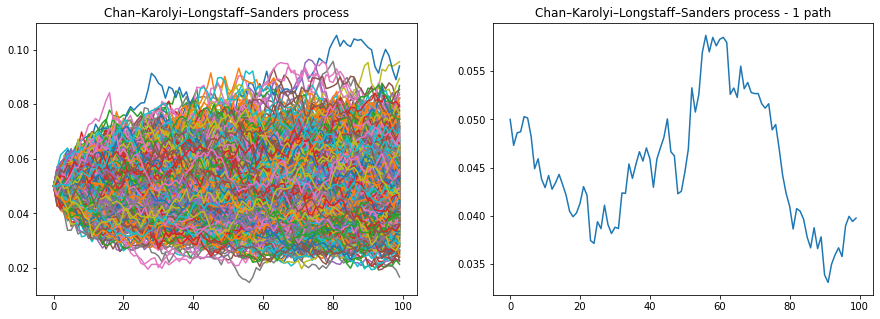

In [14]:
rates = np.empty([paths, grid_points])
rates.T[0] = r

gamma = 0.5

for path_idx in range(paths):
    for idx in range(grid_points - 1):
        rates[path_idx, idx + 1] = (
            rates[path_idx, idx] + theta * (mu - rates[path_idx, idx]) * dt
            + vol * (rates[path_idx, idx] ** gamma) * rng.standard_normal() * np.sqrt(dt)
        )
   
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.patch.set_facecolor('white')
ax1.plot(rates.T)
ax1.set_title("Chan–Karolyi–Longstaff–Sanders process")
ax2.plot(rates[0])
ax2.set_title("Chan–Karolyi–Longstaff–Sanders process - 1 path")
plt.show()